# ОИАД. Лабораторная работа №2

## Входные данные
Датасет: **datasets/students_simple.csv**
Выбираются 2 слобкика данных по формулам:
1) $N \\% 5$
2) $N^2 \\% 5 + 5$
где $N$ - номер в списке

## 1. Расчет корреляций
1. Фехнера
2. Пирсона + доверительный интервал
3. Спирмена
4. Кенделла

## 2. Визуализация
1. Гистограммы
2. График рассеяния (scatter plot)

## 3. Уравнение регрессии
Построить уравнение регрессии по видам:
1. линейная, $y=w_1 x + w_0$
2. квадратичная, $y = w_2 x^2 + w_1 x + w_0$
3. гиперболическая, $y = \frac{w_1}{x} + w_0$
4. показательная, $y = w_1^x \cdot w_0$

Показать результаты на графиках

## 4. Проверка уравнения регрессии
Для наилучшего и наихудшего уравнения регрессии проверить соотвествие моедли данным с помощью критерия Фишера

## 5. Выводы
Сделать вывод по каждому пункту

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.optimize import curve_fit
import warnings
warnings.filterwarnings('ignore')


from google.colab import drive
drive.mount('/content/drive')
filePath = '/content/drive/My Drive/7S/OIIAI/students_simple.csv'

plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

Mounted at /content/drive


In [2]:
df = pd.read_csv(filePath)
print("Size:", df.shape)
print("\nFirst rows:")
print(df.head())

Size: (20, 10)

First rows:
   height  mass  income   iq  pages  age    bmi  work_exp  friends  test_time
0     159    45     430   95     24   20  3.533        26        5        8.5
1     160    61     640  115     32   25  2.623        63        7        6.2
2     161    56     610  111     24   28  2.875        94       10        6.8
3     162    48     330   97     24   19  3.375        16        4       12.0
4     162    54     420  105     60   23  3.000        49        2        7.5


In [3]:
N = 10
col1 = N % 5
col2 = (N**2 % 5) + 5


columns = df.columns
x_col = columns[col1]
y_col = columns[col2]

print(f"N = {N}")
print(f"Col 1 (N % 5 = {col1}): {x_col}")
print(f"Col 2 (N² % 5 + 5 = {col2}): {y_col}")

x = df[x_col].dropna().values
y = df[y_col].dropna().values

min_len = min(len(x), len(y))
x = x[:min_len]
y = y[:min_len]

print(f"\nSamples amount: {len(x)}")

N = 10
Col 1 (N % 5 = 0): height
Col 2 (N² % 5 + 5 = 5): age

Samples amount: 20


# 1) Correlations

## 1.1 Fechner

In [4]:
def fechner_correlation(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    x_sign = np.sign(x - x_mean)
    y_sign = np.sign(y - y_mean)

    matches = np.sum(x_sign == y_sign)
    mismatches = np.sum(x_sign != y_sign)

    K = (matches - mismatches) / len(x)
    return K

## 1.2 Pirson, CI

In [5]:
def pearson_with_ci(x, y, alpha=0.05):
    r, p_value = stats.pearsonr(x, y)

    # Доверительный интервал Фишера
    z = np.arctanh(r)
    se = 1 / np.sqrt(len(x) - 3)
    z_crit = stats.norm.ppf(1 - alpha/2)

    z_lower = z - z_crit * se
    z_upper = z + z_crit * se

    r_lower = np.tanh(z_lower)
    r_upper = np.tanh(z_upper)

    return r, (r_lower, r_upper), p_value

## 1.3 Spearman

In [6]:
def spearman_correlation(x, y):
    return stats.spearmanr(x, y)[0]

## 1.4 Kendall

In [7]:
def kendall_correlation(x, y):
    return stats.kendalltau(x, y)[0]

## Calc all

In [8]:
fechner = fechner_correlation(x, y)
pearson, pearson_ci, pearson_p = pearson_with_ci(x, y)
spearman = spearman_correlation(x, y)
kendall = kendall_correlation(x, y)

print("CORRELATION ANALYSIS RESULTS")
print("=" * 50)
print(f"Fechner: {fechner:.4f}")
print(f"Pirson: {pearson:.4f}")
print(f"CI for Pirson (95%): [{pearson_ci[0]:.4f}, {pearson_ci[1]:.4f}]")
print(f"p-value: {pearson_p:.6f}")
print(f"Spearman: {spearman:.4f}")
print(f"Kendall: {kendall:.4f}")

CORRELATION ANALYSIS RESULTS
Fechner: 0.1000
Pirson: 0.1944
CI for Pirson (95%): [-0.2715, 0.5865]
p-value: 0.411547
Spearman: 0.1750
Kendall: 0.1223


# 2) View

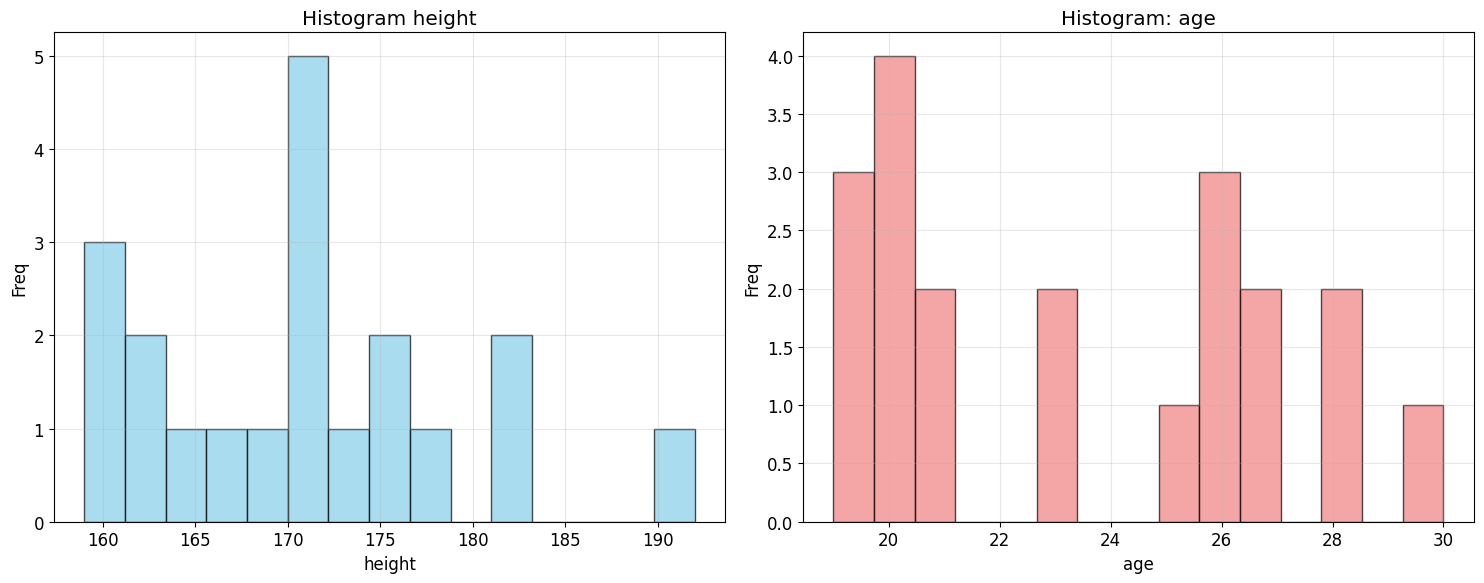

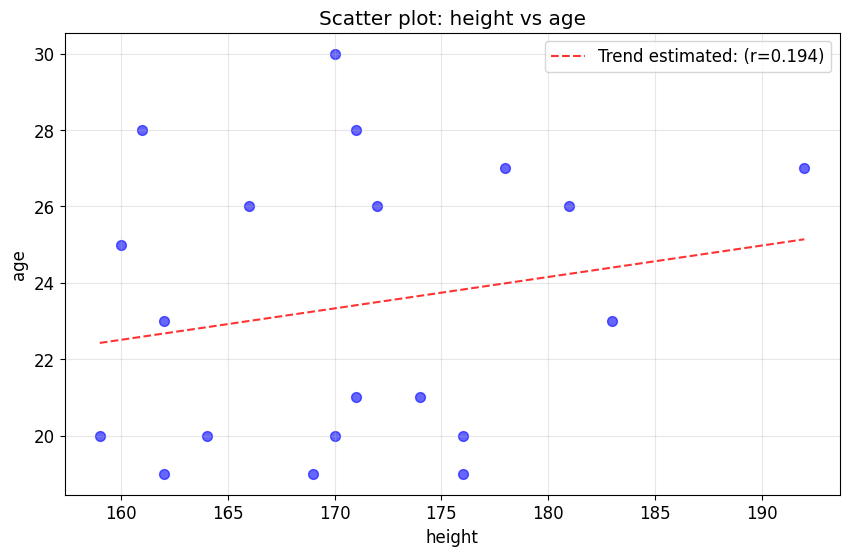

In [9]:
# Histograms
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# X
ax1.hist(x, bins=15, alpha=0.7, color='skyblue', edgecolor='black')
ax1.set_xlabel(x_col)
ax1.set_ylabel('Freq')
ax1.set_title(f'Histogram {x_col}')
ax1.grid(alpha=0.3)

# Y
ax2.hist(y, bins=15, alpha=0.7, color='lightcoral', edgecolor='black')
ax2.set_xlabel(y_col)
ax2.set_ylabel('Freq')
ax2.set_title(f'Histogram: {y_col}')
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.6, color='blue', s=50)
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.title(f'Scatter plot: {x_col} vs {y_col}')
plt.grid(alpha=0.3)

# Trend
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--", alpha=0.8, label=f'Trend estimated: (r={pearson:.3f})')
plt.legend()

plt.show()

# 3) Regression

## Calc

In [10]:
import numpy as np
from scipy.optimize import curve_fit

# Model functions
def linear_func(x, w1, w0):
    return w1 * x + w0

def quadratic_func(x, w2, w1, w0):
    return w2 * x**2 + w1 * x + w0

def hyperbolic_func(x, w1, w0):
    return w1 / x + w0

def exponential_func(x, w1, w0):
    return w0 * (w1 ** x)

# LSQ
def fit_model(func, x, y, p0=None, bounds=(-np.inf, np.inf)):
    try:

        if len(x) == 0 or len(y) == 0 or len(x) != len(y):
            return None, None, np.inf, -np.inf

        mask = np.isfinite(x) & np.isfinite(y)
        if func == hyperbolic_func:
            mask = mask & (x != 0)  # MARK: For hyperbolic

        x_clean = x[mask]
        y_clean = y[mask]

        if len(x_clean) < 2:
            return None, None, np.inf, -np.inf


        popt, pcov = curve_fit(func, x_clean, y_clean, p0=p0, bounds=bounds, maxfev=5000)
        y_pred = func(x_clean, *popt)
        mse = np.mean((y_clean - y_pred)**2)
        r_squared = 1 - np.sum((y_clean - y_pred)**2) / np.sum((y_clean - np.mean(y_clean))**2)
        return popt, y_pred, mse, r_squared
    except Exception as e:
        print(f"[ERR] model selection issue: {e}")
        return None, None, np.inf, -np.inf

print("TRAIN")
print("=" * 50)

print("Preventive analysis:")
print(f"X: min={np.min(x):.2f}, max={np.max(x):.2f}, mean={np.mean(x):.2f}")
print(f"Y: min={np.min(y):.2f}, max={np.max(y):.2f}, mean={np.mean(y):.2f}")
print(f"Количество наблюдений: {len(x)}")

# Linear
print(f"\n1. LINEAR MODEL:")
lin_params, lin_pred, lin_mse, lin_r2 = fit_model(linear_func, x, y, p0=[1, 0])
if lin_params is not None:
    print(f"   y = {lin_params[0]:.4f}·x + {lin_params[1]:.4f}")
    print(f"   MSE = {lin_mse:.4f}, R² = {lin_r2:.4f}")
else:
    print("   [ERR] Training failed")

# Quad
print(f"\n2. QUAD MODEL:")
quad_params, quad_pred, quad_mse, quad_r2 = fit_model(quadratic_func, x, y, p0=[0, 0, 0])
if quad_params is not None:
    print(f"   y = {quad_params[0]:.4f}·x² + {quad_params[1]:.4f}·x + {quad_params[2]:.4f}")
    print(f"   MSE = {quad_mse:.4f}, R² = {quad_r2:.4f}")
else:
    print("   [ERR] Training failed")

# Hyperbolic
print(f"\n3. HYPERBOLIC MODEL:")
if np.any(x != 0):
    hyper_params, hyper_pred, hyper_mse, hyper_r2 = fit_model(hyperbolic_func, x, y, p0=[1, 0])
    if hyper_params is not None:
        print(f"   y = {hyper_params[0]:.4f}/x + {hyper_params[1]:.4f}")
        print(f"   MSE = {hyper_mse:.4f}, R² = {hyper_r2:.4f}")
    else:
        print("   [ERR] Training failed")
else:
    print("   [ERR] Training failed (all x=0)")

# Exponential
print(f"\n4. EXPONENTIAL MODEL:")

exp_params, exp_pred, exp_mse, exp_r2 = fit_model(exponential_func, x, y, p0=[1, 1], bounds=(0, [10, np.inf]))
if exp_params is not None:
    print(f"   y = {exp_params[1]:.4f}·{exp_params[0]:.4f}ˣ")
    print(f"   MSE = {exp_mse:.4f}, R² = {exp_r2:.4f}")
else:
    print("   [ERR] Training failed")

# Results
models = {}
if lin_params is not None:
    models['Linear'] = (linear_func, lin_params, lin_pred, lin_mse, lin_r2)
if quad_params is not None:
    models['Quad'] = (quadratic_func, quad_params, quad_pred, quad_mse, quad_r2)
if 'hyper_params' in locals() and hyper_params is not None:
    models['Hyperbolic'] = (hyperbolic_func, hyper_params, hyper_pred, hyper_mse, hyper_r2)
if exp_params is not None:
    models['Exponential'] = (exponential_func, exp_params, exp_pred, exp_mse, exp_r2)

print(f"\nSuccessfully trained: {len(models)}")

TRAIN
Preventive analysis:
X: min=159.00, max=192.00, mean=170.85
Y: min=19.00, max=30.00, mean=23.40
Количество наблюдений: 20

1. LINEAR MODEL:
   y = 0.0823·x + 9.3470
   MSE = 12.0662, R² = 0.0378

2. QUAD MODEL:
   y = 0.0053·x² + -1.7715·x + 169.6887
   MSE = 11.8390, R² = 0.0559

3. HYPERBOLIC MODEL:
   y = -2351.7119/x + 37.1970
   MSE = 12.1051, R² = 0.0347

4. EXPONENTIAL MODEL:
   y = 12.7019·1.0036ˣ
   MSE = 12.0537, R² = 0.0388

Successfully trained: 4


## View

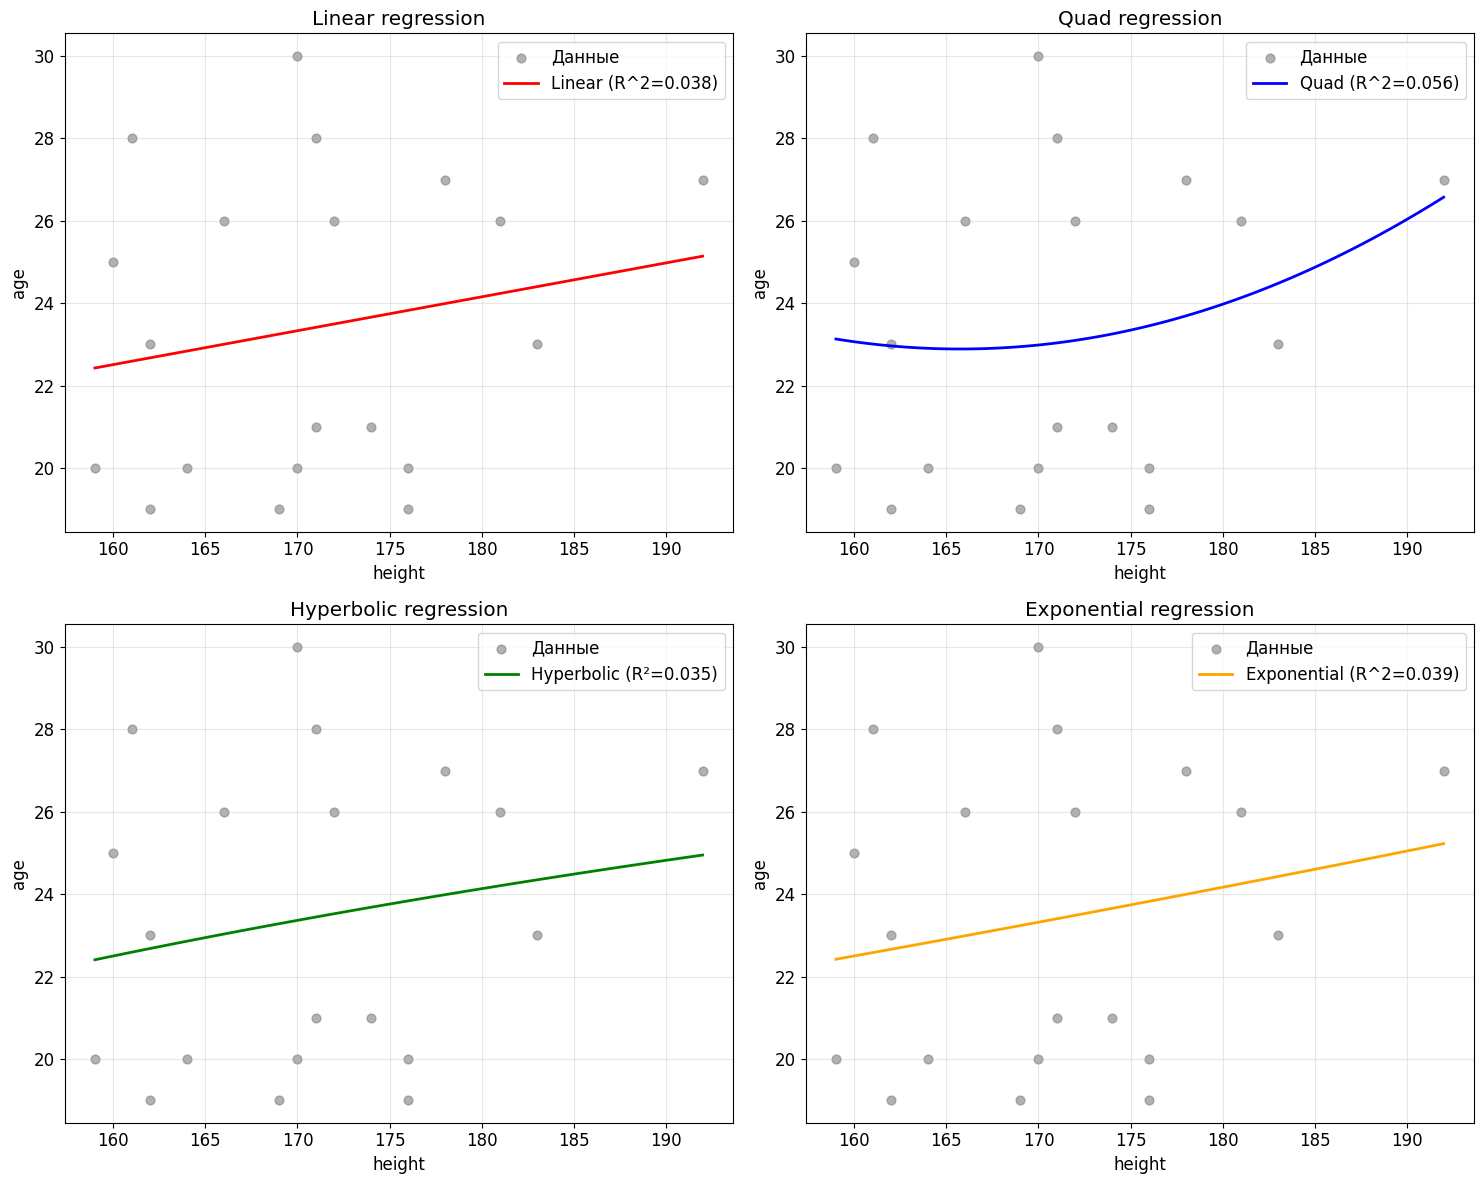

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

models_list = list(models.items())
colors = ['red', 'blue', 'green', 'orange']

for idx, (name, (func, params, pred, mse, r2)) in enumerate(models_list):
    if params is None:
        continue

    axes[idx].scatter(x, y, alpha=0.6, color='gray', s=40, label='Данные')

    x_smooth = np.linspace(np.min(x), np.max(x), 100)
    if name == 'Hyperbolic':
        x_smooth_plot = x_smooth[x_smooth != 0]
        y_smooth = func(x_smooth_plot, *params)
        axes[idx].plot(x_smooth_plot, y_smooth, color=colors[idx], linewidth=2,
                      label=f'{name} (R²={r2:.3f})')
    else:
        y_smooth = func(x_smooth, *params)
        axes[idx].plot(x_smooth, y_smooth, color=colors[idx], linewidth=2,
                      label=f'{name} (R^2={r2:.3f})')

    axes[idx].set_xlabel(x_col)
    axes[idx].set_ylabel(y_col)
    axes[idx].set_title(f'{name} regression')
    axes[idx].legend()
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# 4) Fisher criterion test

In [12]:
def fisher_test(r_squared, n, k, alpha=0.05):
    if r_squared < 0:
        return False, np.nan, np.nan

    F_stat = (r_squared / (1 - r_squared)) * ((n - k) / (k - 1))
    F_critical = stats.f.ppf(1 - alpha, k-1, n-k)

    is_significant = F_stat > F_critical
    p_value = 1 - stats.f.cdf(F_stat, k-1, n-k)

    return is_significant, F_stat, F_critical, p_value

# Best, worst
valid_models = {name: data for name, data in models.items() if data[1] is not None and data[4] >= 0}
if valid_models:
    best_model = max(valid_models.items(), key=lambda x: x[1][4])
    worst_model = min(valid_models.items(), key=lambda x: x[1][4])

    print("REGRESSION TESTS")
    print("=" * 50)

    for name, (_, _, _, _, r2) in [best_model, worst_model]:
        k = 2 if name == 'Linear' else 3                        # MARK: params amount
        significant, F_stat, F_crit, p_val = fisher_test(r2, len(x), k)

        print(f"\n{name} model (R^2 = {r2:.4f}):")
        print(f"  F-stat = {F_stat:.4f}")
        print(f"  Critical F value = {F_crit:.4f}")
        print(f"  p-value = {p_val:.6f}")
        print(f"  Model is {'significant' if significant else 'non-significant'} at 5% level")
else:
    print("[ERR]: No valid data")

REGRESSION TESTS

Quad model (R^2 = 0.0559):
  F-stat = 0.5033
  Critical F value = 3.5915
  p-value = 0.613283
  Model is non-significant at 5% level

Hyperbolic model (R^2 = 0.0347):
  F-stat = 0.3054
  Critical F value = 3.5915
  p-value = 0.740788
  Model is non-significant at 5% level
